In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,318,34,Private,209297,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,Black,Male,0,2001,40,United-States,<=50K
1,11608,32,Private,107417,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,37,United-States,<=50K
2,2362,59,Local-gov,296253,Masters,14,Divorced,Prof-specialty,Unmarried,White,Female,8614,0,60,United-States,>50K
3,17387,44,Federal-gov,102238,HS-grad,9,Divorced,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
4,22358,27,?,190650,Bachelors,13,Never-married,?,Unmarried,Asian-Pac-Islander,Male,0,0,25,Philippines,<=50K


In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   fnlwgt          29305 non-null  int64 
 3   education       29305 non-null  object
 4   education.num   29305 non-null  int64 
 5   marital.status  29305 non-null  object
 6   occupation      29305 non-null  object
 7   relationship    29305 non-null  object
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  capital.gain    29305 non-null  int64 
 11  capital.loss    29305 non-null  int64 
 12  hours.per.week  29305 non-null  int64 
 13  native.country  29305 non-null  object
 14  income          29305 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.4+ MB


In [6]:
cat = df[['workclass','education','marital.status','occupation','relationship','race','sex','native.country','income']]

In [7]:
num = df[['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']]

In [8]:
df['workclass'].unique()


array(['Private', 'Local-gov', 'Federal-gov', '?', 'Self-emp-not-inc',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [9]:
df['education'].unique()

array(['HS-grad', 'Masters', 'Bachelors', 'Assoc-acdm', 'Some-college',
       '11th', '10th', 'Assoc-voc', 'Preschool', '7th-8th', 'Doctorate',
       '5th-6th', 'Prof-school', '1st-4th', '9th', '12th'], dtype=object)

In [10]:
df['marital.status'].unique()

array(['Never-married', 'Divorced', 'Married-civ-spouse', 'Separated',
       'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [11]:
df['occupation'].unique()

array(['Machine-op-inspct', 'Other-service', 'Prof-specialty',
       'Craft-repair', '?', 'Protective-serv', 'Exec-managerial', 'Sales',
       'Farming-fishing', 'Transport-moving', 'Handlers-cleaners',
       'Adm-clerical', 'Tech-support', 'Priv-house-serv', 'Armed-Forces'],
      dtype=object)

In [12]:
df['relationship'].unique()

array(['Not-in-family', 'Unmarried', 'Husband', 'Own-child',
       'Other-relative', 'Wife'], dtype=object)

In [13]:
df['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [14]:
df['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [15]:
df['native.country'].unique()

array(['United-States', 'Philippines', 'Puerto-Rico', 'Mexico', 'Cuba',
       'India', 'Jamaica', 'South', 'Laos', 'England', '?', 'El-Salvador',
       'Germany', 'Thailand', 'Poland', 'China', 'Greece',
       'Trinadad&Tobago', 'Canada', 'France', 'Dominican-Republic',
       'Columbia', 'Nicaragua', 'Haiti', 'Cambodia', 'Peru', 'Taiwan',
       'Hungary', 'Italy', 'Japan', 'Vietnam', 'Honduras', 'Portugal',
       'Guatemala', 'Iran', 'Ecuador', 'Scotland', 'Yugoslavia', 'Hong',
       'Outlying-US(Guam-USVI-etc)', 'Ireland', 'Holand-Netherlands'],
      dtype=object)

In [16]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [17]:
count_interrogantes_por_columna = cat.apply(lambda x: x.str.contains('\?').sum())
print(count_interrogantes_por_columna)

workclass         1641
education            0
marital.status       0
occupation        1648
relationship         0
race                 0
sex                  0
native.country     524
income               0
dtype: int64


In [18]:
cat = df[['workclass','education','marital.status','occupation','relationship','race','sex','native.country']]
num = df[['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']]
target = df['income'].replace({'<=50K': 0, '>50K': 1})




C:\Users\Master\AppData\Local\Temp\ipykernel_13088\3931959300.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target = df['income'].replace({'<=50K': 0, '>50K': 1})


In [19]:
# Inicializar el MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(num), columns=num.columns)

# Mostrar el DataFrame escalado
print(df_scaled)



            age    fnlwgt  education.num  capital.gain  capital.loss  \
0      0.232877  0.133801       0.533333      0.000000      0.459366   
1      0.205479  0.064609       0.533333      0.000000      0.000000   
2      0.575342  0.192858       0.866667      0.086141      0.000000   
3      0.369863  0.061092       0.533333      0.000000      0.000000   
4      0.136986  0.121137       0.800000      0.000000      0.000000   
...         ...       ...            ...           ...           ...   
29300  0.054795  0.199555       0.600000      0.000000      0.000000   
29301  0.315068  0.144032       0.266667      0.000000      0.000000   
29302  0.191781  0.162572       0.600000      0.000000      0.340909   
29303  0.328767  0.018538       0.600000      0.000000      0.000000   
29304  0.520548  0.095896       0.866667      0.000000      0.453857   

       hours.per.week  
0            0.397959  
1            0.367347  
2            0.602041  
3            0.397959  
4            0.

In [20]:

# Realizar One-Hot Encoding para las columnas categóricas 'education' y 'gender'
df_encoded = pd.get_dummies(cat, drop_first=False)

# Mostrar el DataFrame resultante
print(df_encoded)

       workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0            False                  False                False   
1            False                  False                False   
2            False                  False                 True   
3            False                   True                False   
4             True                  False                False   
...            ...                    ...                  ...   
29300        False                  False                False   
29301         True                  False                False   
29302        False                  False                False   
29303        False                  False                False   
29304        False                  False                False   

       workclass_Never-worked  workclass_Private  workclass_Self-emp-inc  \
0                       False               True                   False   
1                       False               True       

In [21]:
df_combined = pd.concat([df_scaled, df_encoded,target], axis=1)

In [22]:
df_combined.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income
0,0.232877,0.133801,0.533333,0.000000,0.459366,0.397959,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
1,0.205479,0.064609,0.533333,0.000000,0.000000,0.367347,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
2,0.575342,0.192858,0.866667,0.086141,0.000000,0.602041,False,False,True,False,...,False,False,False,False,False,False,True,False,False,1
3,0.369863,0.061092,0.533333,0.000000,0.000000,0.397959,False,True,False,False,...,False,False,False,False,False,False,True,False,False,0
4,0.136986,0.121137,0.800000,0.000000,0.000000,0.244898,True,False,False,False,...,False,False,False,False,False,False,False,False,False,0


In [23]:
X = df_combined.drop('income',axis = 1)
y = df_combined['income']

In [24]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_pred = rf_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

# Mostrar la precisión
print(f"Accuracy del modelo: {accuracy * 100:.2f}%")

Accuracy del modelo: 85.91%


In [29]:
param_grid = {
    'n_estimators': [50, 100],  # Menos valores para el número de árboles
    'max_depth': [None, 10],     # Profundidad máxima, con valor por defecto y uno limitado
    'min_samples_split': [2, 5]  # Menos valores para la división mínima de muestras
}

# Paso 5: Aplicar GridSearchCV para encontrar la mejor combinación de parámetros
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             verbose=2)

In [31]:
best_rf = grid_search.best_estimator_

# Realizar predicciones con el modelo de mejor desempeño
y_pred = best_rf.predict(X_test)

# Evaluar precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")
print(f"Precisión del modelo con los mejores parámetros: {accuracy * 100:.2f}%")

Mejores parámetros encontrados: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Precisión del modelo con los mejores parámetros: 86.27%


In [27]:
# Obtener la importancia de las características
importances = rf_classifier.feature_importances_

# Crear un DataFrame para mostrar las características y su importancia
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Ordenar las características por su importancia de mayor a menor
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_5_features = importance_df.head(10)

# Mostrar las características y su importancia
print(importance_df)


                              Feature    Importance
1                              fnlwgt  1.552617e-01
0                                 age  1.503879e-01
3                        capital.gain  8.959595e-02
5                      hours.per.week  8.431353e-02
33  marital.status_Married-civ-spouse  7.277316e-02
..                                ...           ...
87             native.country_Ireland  1.748251e-05
40            occupation_Armed-Forces  9.687594e-06
82            native.country_Honduras  8.622716e-06
9              workclass_Never-worked  6.210092e-06
81  native.country_Holand-Netherlands  8.133434e-07

[108 rows x 2 columns]


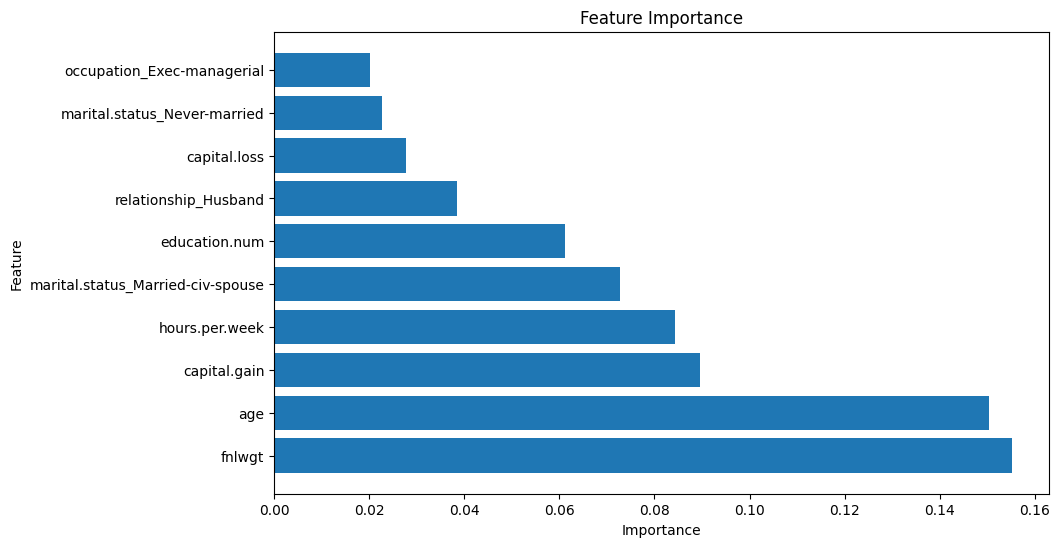

In [28]:


# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(top_5_features['Feature'], top_5_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()
